In [2]:
#KINTALI SAHIL
#CS20B1114
#IIITDM KANCHEEPURAM

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load CSV files
books = pd.read_csv('books.csv')
book_tags = pd.read_csv('book_tags.csv')
ratings = pd.read_csv('ratings.csv')

In [5]:
#Question 1: How many books do not have an original title [books.csv]?

missing_titles_count = books['original_title'].isnull().sum()
print(f"Q1: Number of books without an original title: {missing_titles_count}")

Q1: Number of books without an original title: 36


In [19]:
#Question 2: How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

# Remove records with null values in original_title column
#books_filtered = books.dropna(subset=['original_title'])
#unique_books_count = len(books_filtered['book_id'].unique())
#print(f"Q2: Number of unique books: {unique_books_count}")

goodReadIds=books[books['original_title'].isnull()].goodreads_book_id
booksIds=books[books['original_title'].isnull()].book_id
books.dropna(subset=['original_title'],inplace=True)
book_tags=book_tags[~book_tags['goodreads_book_id'].isin(goodReadIds)]
ratings=ratings[~ratings['book_id'].isin(booksIds)]
books['book_id'].nunique()

363

In [20]:
#Question 3: How many unique users are present in the dataset [ratings.csv] ?

unique_users_count = ratings['user_id'].nunique()
print(f"Q3: Number of unique users: {unique_users_count}")

Q3: Number of unique users: 40573


In [21]:
#Question 4: How many unique tags are there in the dataset [book_tags.csv] ?

unique_tags_count = len(book_tags['tag_id'].unique())
print(f"Q4: Number of unique tags: {unique_tags_count}")


Q4: Number of unique tags: 3459


In [22]:
#Question 5: Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

most_frequent_tag_id = book_tags['tag_id'].value_counts().idxmax()
print(f"Q5: Most frequently used tag_id: {most_frequent_tag_id}")

Q5: Most frequently used tag_id: 4600


In [23]:
#Question 6: Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

# Merge the DataFrames based on good_reads_bookid
merged_data = pd.merge(books, book_tags, how='inner', on='goodreads_book_id')

# Find the book with the most number of counts of tags
most_tagged_book = merged_data.groupby('title')['count'].sum().idxmax()

print(f"Q6: The book with the most counts of tags is: {most_tagged_book}")


Q6: The book with the most counts of tags is: Bossypants


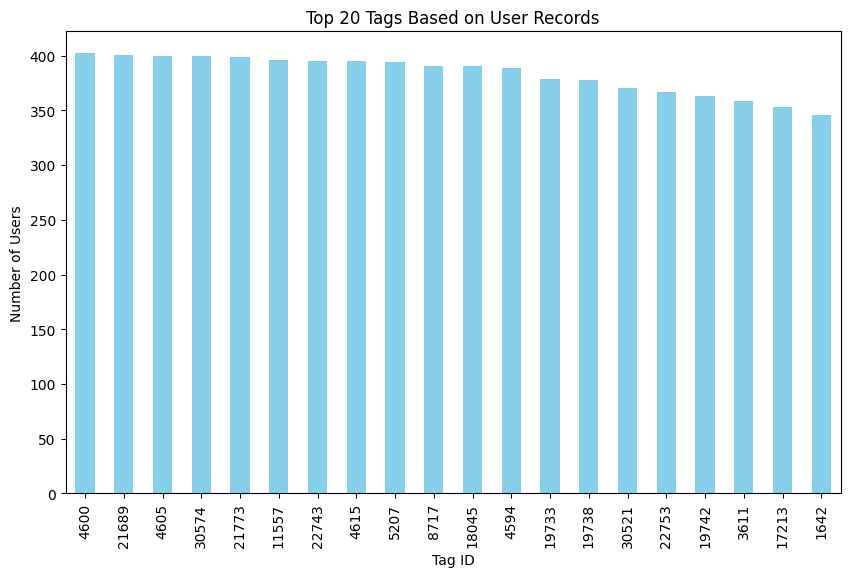

In [12]:
#Question 7: Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]

# Group by tag_id and calculate the count of unique users
tag_user_counts = book_tags.groupby('tag_id')['goodreads_book_id'].nunique()

# Sort in descending order and get the top 20 tags
top_tags = tag_user_counts.sort_values(ascending=False).head(20)

# Plot the bar chart
plt.figure(figsize=(10, 6))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags Based on User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of Users')
plt.show()